In [1]:
import gradflow.functions as F
from gradflow.model import Model
from gradflow.optim import Adam

from datasets.mnist import MNISTDataset

import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Autoencoder(Model):
  def __init__(self, encoding_dim = 48):
    super().__init__()
    self.enc = F.Linear(28*28, encoding_dim)
    self.relu = F.ReLU()

    self.dec = F.Linear(encoding_dim, 28*28)
    self.sigmoid = F.Sigmoid()
  
  def encode(self, x):
    return self.relu(self.enc(x))

  def decode(self, x):
    return self.sigmoid(self.dec(x))
  
  def forward(self, x):
    out = self.encode(x)
    out = self.decode(out)
    return out

In [3]:
train_dset = MNISTDataset("../data/", batch_size=32*3, shuffle=True)
test_dset = MNISTDataset("../data/", batch_size=10, train=False)

train-images-idx3-ubyte.gz already exists in ../data. Skipping...
t10k-images-idx3-ubyte.gz already exists in ../data. Skipping...
train-labels-idx1-ubyte.gz already exists in ../data. Skipping...
t10k-labels-idx1-ubyte.gz already exists in ../data. Skipping...
train-images-idx3-ubyte.gz already exists in ../data. Skipping...
t10k-images-idx3-ubyte.gz already exists in ../data. Skipping...
train-labels-idx1-ubyte.gz already exists in ../data. Skipping...
t10k-labels-idx1-ubyte.gz already exists in ../data. Skipping...


In [4]:
model = Autoencoder()
criterion = F.BCELoss()
optimizer = Adam(model.parameters(), 0.01, weight_decay=0)

In [5]:
training_loss = []
for epoch in range(1):
  for i, (imgs, labels) in enumerate(train_dset):
    optimizer.zero_grad()

    outputs = model(imgs)
    loss = criterion(outputs, imgs)
    training_loss += [loss.data]

    loss.backward()

    optimizer.step()

    if ((i + 1) % 100 == 0):
      print(loss.data)

0.17371088
0.13061658
0.111691974
0.097862504
0.0898097
0.0947761


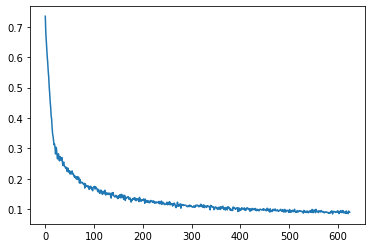

In [6]:
plt.plot(training_loss)

Encoding: [ 9.143274    0.3357873   8.736981    7.468918    5.4140463  11.150193
  8.813349    1.6366462   4.9229875   1.4316891   6.675541    5.664076
  5.758483    2.3191195   4.5663567   1.0981239   3.823604    3.7398589
  7.307637    8.355079   10.138734    4.3052397  -0.          1.0693724
  0.28094912  5.7442164   9.074259    8.312573    5.1163716   8.559856
  9.14129     6.066019    6.3751173   0.13697176  6.8905334   0.19538021
 10.447444    4.888298    4.8048725  11.479805    7.6426935   7.613428
  7.0409884   3.1079855   9.165084   14.999779    7.4779897  -0.        ]


Text(0.5, 1.0, 'Predicted')

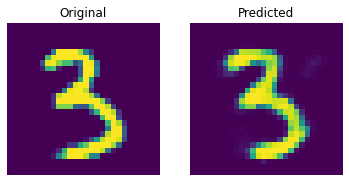

In [7]:
batch = 3
im = 2

true_imgs = test_dset[batch][0]

encodings = model.encode(true_imgs)
print("Encoding:", encodings.data[im])

pred_imgs = model.decode(encodings)

fig = plt.figure()
fig.add_subplot(1, 2, 1)
plt.imshow(true_imgs.data[im].reshape(28, 28))
plt.axis("off")
plt.title("Original")

fig.add_subplot(1, 2, 2)
plt.imshow(pred_imgs.data[im].reshape(28, 28))
plt.axis("off")
plt.title("Predicted")

In [8]:
def print_batch(batch, width, height, show_orig = True):
  true_imgs, true_labels = batch
  pred_imgs = model(true_imgs)

  i = 1
  fig = plt.figure(figsize=(height*3, width*4))
  for w in range(width):
    for h in range(height):
      idx = w * height + h
      label = np.argmax(true_labels.data[idx])

      if show_orig:
        fig.add_subplot(width * 2, height * 2, i); i+=1
        plt.imshow(true_imgs.data[idx].reshape(28, 28))
        plt.axis("off")
        plt.title(f"Original ({label})")

      fig.add_subplot(width * 2, height * 2, i); i+=1
      plt.imshow(pred_imgs.data[idx].reshape(28, 28))
      plt.axis("off")
      plt.title(f"Predicted ({label})")

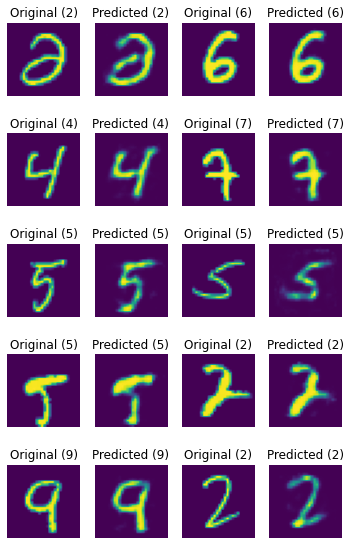

In [9]:
print_batch(test_dset[333], 5, 2)